In [1]:
username = "HOME"
pathtorepo = "C:\\Users\\" *username *  "\\Desktop\\"
using Pkg
Pkg.activate(pathtorepo * "dynamical-systems\\env\\integrate\\")
include(pathtorepo * "dynamical-systems\\system.jl")
include(pathtorepo * "dynamical-systems\\visual_regimes.jl");

  Activating project at `C:\Users\HOME\Desktop\dynamical-systems\env\integrate`

In [2]:
using StaticArrays, DifferentialEquations, DynamicalSystems
E, x, y  = -40..40, -5..5,  -5..5
box = E × x × y
using CairoMakie, GLMakie
using LinearAlgebra

In [3]:
const τ = 0.013;  const τD = 0.07993;  const τy = 3.3;  const J = 3.07;  const β = 0.300
const xthr = 0.75; const ythr = 0.4
const α = 1.58; const ΔU0 = 0.305; 

In [4]:
time = 1000; tt = 1000; tstep = 0.001; times = [time, tt]
integ_set = (alg = Vern9(), adaptive = false, dt = tstep);

In [5]:
I0 = -1.7071205330241375; U0 = 0.26506094791239404
p = SA[α, τ, τD, τy, J, xthr, ythr, U0, ΔU0, β, I0]
u0_1 = [8.421422866701183, 0.7359215519694303, 0.43895581827508423] # SA[8.054797242493304, 0.7437113804461553, 0.4383355523705589];

3-element Vector{Float64}:
 8.421422866701183
 0.7359215519694303
 0.43895581827508423

In [6]:
ds = CoupledODEs(TM, u0_1, p, diffeq = integ_set)

3-dimensional CoupledODEs
 deterministic: true
 discrete time: false
 in-place:      false
 dynamic rule:  TM
 ODE solver:    Vern9
 ODE kwargs:    (adaptive = false, dt = 0.001)
 parameters:    [1.58, 0.013, 0.07993, 3.3, 3.07, 0.75, 0.4, 0.26506094791239404, 0.305, 0.3, -1.7071205330241375]
 time:          0.0
 state:         [8.421422866701183, 0.7359215519694303, 0.43895581827508423]


In [7]:
lyapunovspectrum(ds, 1000)

3-element Vector{Float64}:
  0.6188644683571582
  0.004013984192078036
 -4.028887986621061

In [7]:
fp, ei, _ = fixedpoints(ds, box, jacob_TM_);

In [8]:
prob_for = ODEProblem(TM, u0_1, (0.0, 1000), p)
sol_for = solve(prob_for, alg = Vern9(), adaptive = false, dt = 0.001); 

In [9]:
println("Length: $(length(sol_for))")
println("Last point: $(sol_for[end])")

Length: 1000002
Last point: [9.205083812121998, 0.7118046470973897, 0.553017678246954]


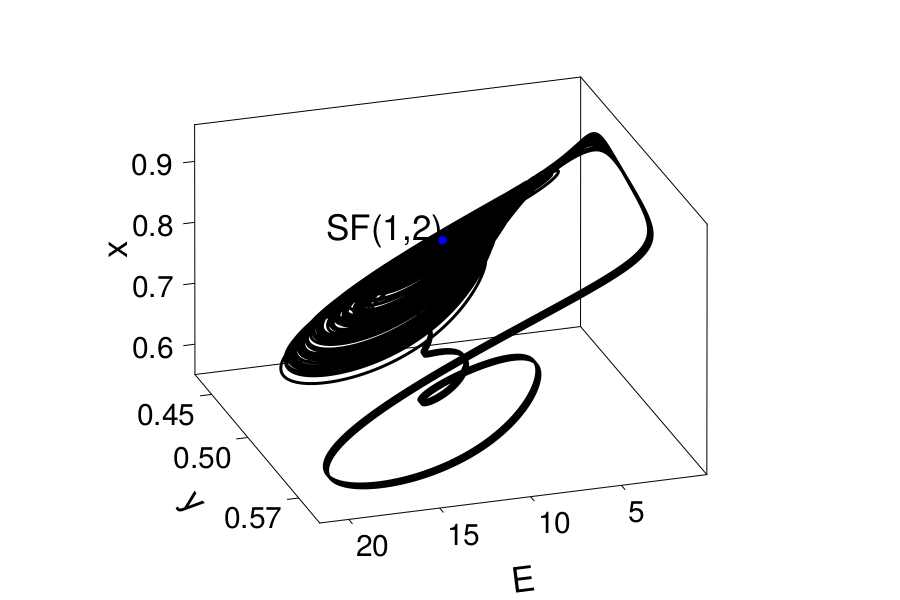

CairoMakie.Screen{IMAGE}


In [125]:
ts, tf = 120000, 300000
idx, idy, idz = 1, 3, 2
lb_size = 35; tck_size = 30;
dis  = 60;

CairoMakie.activate!()
f = Figure(resolution = (900, 600))
ax = Axis3(f[1, 1], azimuth = 0.4pi,
            xlabel = "E", ylabel = "y", zlabel = "x",
            xlabelsize = lb_size, ylabelsize = lb_size, zlabelsize = lb_size,
            xticklabelsize = tck_size, yticklabelsize = tck_size, zticklabelsize = tck_size,
            xgridvisible = false, ygridvisible = false, zgridvisible = false,
            protrusions = dis, xlabeloffset = dis, ylabeloffset = dis, zlabeloffset = dis,
            yticks = [0.45, 0.50, 0.57])

#ax = LScene(f[1, 1])
#scale!(ax.scene, 1, 50, 50)

lines!(sol_for[idx,ts:tf], sol_for[idy,ts:tf], sol_for[idz,ts:tf],
    linewidth = 3.0, color = :black)

for (i, ep) in enumerate(fp)
    scatter!(ep[idx], ep[idy], ep[idz], color = :blue, markersize = 12)
    text!(ep[idx], ep[idy], ep[idz],text = "SF(1,2)", fontsize = 35, align = (:right, :baseline))
end

display(f)

In [126]:
save("chaotic_homoclinic_phase.pdf", f)

CairoMakie.Screen{PDF}


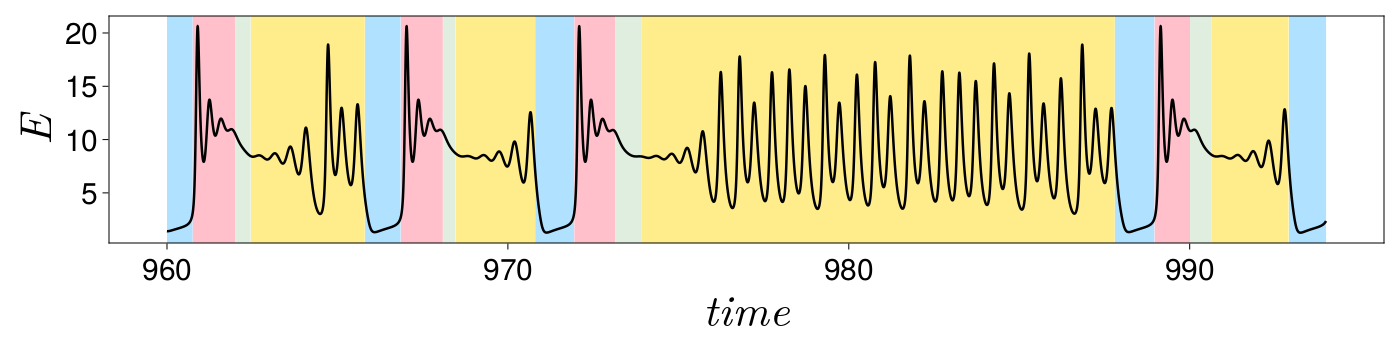

In [134]:
ts, tf = 960000, 994000 #165000, 200000 #500000, 580000

lb_size = 45; tck_size = 30;
CairoMakie.activate!()
f = Figure(resolution = (1400, 350))
axis = Axis(f[1, 1], xlabel = L"$time$", ylabel = L"$E$",
            xlabelsize = lb_size, ylabelsize = lb_size,
            xticklabelsize = tck_size, yticklabelsize = tck_size,
            xgridvisible = false, ygridvisible = false)

#:thistle1)
# mistyrose

bluest = [960, 965.81, 970.801, 987.801, 992.91]
bluend = [960.75, 966.85, 971.94, 988.96, 994]

pinkst = [960.751, 966.86, 971.95, 988.97]
pinkend = [962.0, 968.09, 973.15, 990.2]

ph3st = [962.001, 968.1, 973.151, 990.01]
ph3end = [962.45, 968.46, 973.93, 990.64]

ph4st = [962.46, 968.47, 973.931, 990.641]
ph4end = [965.8, 970.8, 987.8, 992.9]

vspan!(pinkst, pinkend, color = :pink)
vspan!(bluest, bluend, color = :lightskyblue1)
vspan!(ph3st, ph3end, color = :honeydew2)
vspan!(ph4st, ph4end, color = :lightgoldenrod1)

lines!(axis, sol_for.t[ts:tf], sol_for[1, ts:tf], linewidth = 2.5, color = :black)
f

In [135]:
save("chaotic_homoclinic_timeseries.eps", f)

CairoMakie.Screen{EPS}
